# Movimiento parabólico - Melanie Andrea Muñoz Chavarria

In [11]:
import numpy as np
import matplotlib.pylab as plt
import json

###Funciones

In [12]:
gravedad=9.8
#Posición en y
def posicion_y(y0,velocidad_inicial,tiempo,angulo):
  posy=y0 + (velocidad_inicial*np.sin(angulo))*tiempo - (0.5*gravedad*(tiempo**2)) #Ecuación de movimiento para y
  return posy
#Posición en x
def posicion_x(x0,velocidad_inicial,tiempo,angulo):
  posx= x0 + (velocidad_inicial*np.cos(angulo)*tiempo) #Ecuación de movimient para x
  return posx
#Tiempo de Vuelo
def tiempo_vuelo(velocidad_inicial,angulo):
  tiempo_v=(2*velocidad_inicial*np.sin(angulo))/gravedad #Cuando y sea cero, se presenta el tiempo de vuelo
  return tiempo_v

In [14]:
#Datos iniciales
v0=2 # En unidades del sistema internacional [m/s]
theta=30 #Este ángulo se encuentra en grados
theta_rad=np.deg2rad(theta) #Ahora en radianes
tv=tiempo_vuelo(v0,theta_rad)
#Tiempo
t=np.linspace(0,tv,100) #el tiempo cambia, lo que permite que se asignen múltiples valores a los paramétros de la posición de la partícula
x=posicion_x(0,v0,t,theta_rad)
y=posicion_y(0,v0,t,theta_rad)

Text(0.5, 1.0, 'Movimiento parabólico')

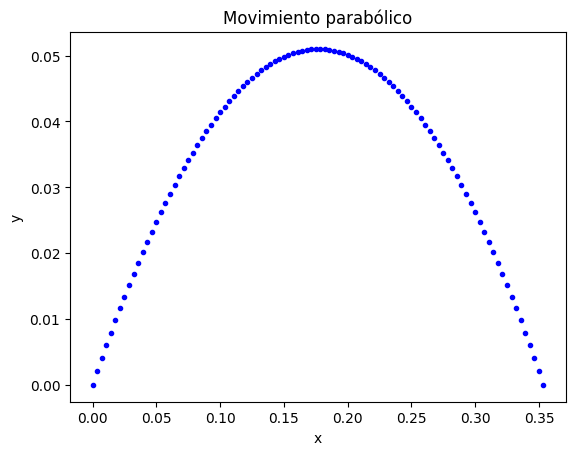

In [15]:
#Este gráfico se desarrolla con los datos inciales
fig,ax=plt.subplots()
ax.plot(x, y,'.b')
ax.set_xlabel("x")
ax.set_ylabel("y")
plt.title('Movimiento parabólico')

###Archivo Json

In [ ]:
dicc={'velocidadI':v0,'theta':theta} #Este debería ser el resultado del archivo Jason

In [2]:
#Lectura de archivo
with open("condicionesiniciales.json",'r') as archivo:
  d=json.load(archivo)
print(d)

{'velocidad': 5, 'angulo': 30}


In [5]:
#Generlaizando el código para la lectura de archivos
def read_file(nombre_archivo):
  with open(nombre_archivo,'r') as archivo:
    d=json.load(archivo)
  return d

#Funciones de movimiento parabólico para la generalización de la lectura de archivos json
gravedad=9.8

#Posición en y para json
def posicion_y1(y0,velocidad,tiempo,angulo):
  angulo1=np.deg2rad(angulo) #El archivo json ingresa un ángulo en radianes, por tanto a las funciones se les agrega está variable.
  posy=y0 + (velocidad*np.sin(angulo1))*tiempo - (0.5*gravedad*(tiempo**2))
  return posy

#Posición en x para json
def posicion_x1(x0,velocidad,tiempo,angulo):
  angulo1= np.deg2rad(angulo)
  posx= x0 + (velocidad*np.cos(angulo1)*tiempo)
  return posx

#Tiempo de Vuelo para Json
def tiempo_vuelo1(velocidad,angulo):
  angulo1= np.deg2rad(angulo)
  tiempo_v=(2*velocidad*np.sin(angulo1))/gravedad
  return tiempo_v


print(read_file('condicionesiniciales.json'))

{'velocidad': 5, 'angulo': 30}


In [8]:
#Datos con el archivo Json
d1=read_file('condicionesiniciales.json')
#Variables con los indices del diccionario que se crea con el archivo json
a=d1['angulo']
v0_1=d1['velocidad']

tv_1=tiempo_vuelo1(v0_1,a)
t1=np.linspace(0,tv_1,100)
x1=posicion_x1(0,v0_1,t1,a)
y1=posicion_y1(0,v0_1,t1,a)


Text(0.5, 1.0, 'Movimiento parabólico')

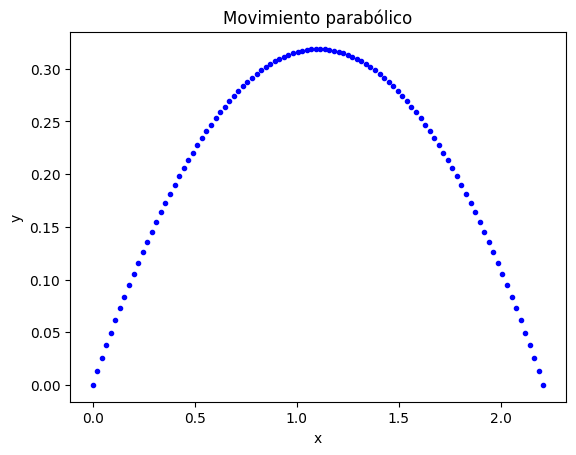

In [9]:
#Gráfico con los datos del archivo json
fig,ax=plt.subplots()
ax.plot(x1, y1,'.b')
ax.set_xlabel("x")
ax.set_ylabel("y")
plt.title('Movimiento parabólico')

###Archivo con Numpy

In [16]:
X = np.array([x,y]) #Para los datos inciales
np.savetxt("parabolico.txt",X.T) #guardar la gráfica como texto

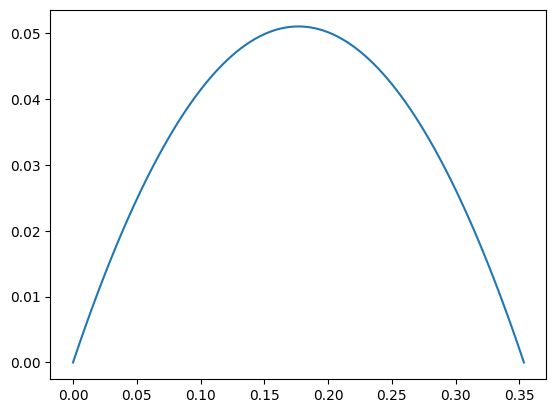

In [17]:
r=np.loadtxt("parabolico.txt") #Guardar como texto
plt.plot(r[:,0], r[:,1])
plt.savefig("parabolico.png") #muestra lo que hay en la gráfica guardada.